# Central Limit Theorem

The Central Limit Theorem (hereafter, CLT) is the most important and most significant result in all of probability and statistics. It explains the profound importance of the normal distribution, and provides a foundation, essentially, for all of elementary statistics. 

In [99]:
import numpy as np
from numpy import arange,linspace, mean, var, std, unique
import matplotlib.pyplot as plt  
from numpy.random import random, randint, uniform, choice, binomial, geometric, exponential
from collections import Counter
%matplotlib inline 

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# This draws a useful bar chart for the distribution of the list of integers in outcomes

def draw_distribution_from_outcomes(outcomes, title='Experimental Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#draw_distribution_from_outcomes([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution_of_random_variable(Rx, Px, title='Probability Mass Function', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,Px,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#draw_distribution_of_random_variable([1,2,3,4], [0.25,0.35,0.15,0.25])

#p = 0.14159234368

#                                                                                        ||||||||||||||||
# Notice how we gave strings as labels for the outcomes:                                 vvvvvvvvvvvvvvvv

#draw_distribution_of_random_variable( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
 


def bernoulli(p):
    if random() < p:
        return 1
    else:
        return 0


## Warm up to the CLT

This section reviews basic results on random variables earlier in the course, but
also introduces formally the notion of the mean of a collection of random variables. 

One of the most significant aspects of the CLT is that it shows how repeated sampling of values from a random variable $X$ results in a random variable whose expected value remains the same as $X$ but with a variance which decreases linearly in the number of samples. 

### The Random Variable  $\overline{X}_n$

Formally, let $X_1, X_2, \ldots, X_n$ be $n$ i.i.d. (independent and identically distributed, so that all have the same finite mean $\mu$ and variance $\sigma^2$.  In the simple case of sampling, each $X_i$ represents 
the random choice of a member of some population, but this is only the most obvious application in statistics. 
 
Now suppose we consider the random variable $\overline{X}_n$ representing the mean of the $X_i$, i.e., 

$$ \overline{X}_n = \frac{X_1 + X_2 + \cdots + X_n}{n}.$$

### Expection of $\overline{X}_n$

First, it is hardly surprising that the mean of $\overline{X}_n$, or the "mean of the mean" remains unchanged, 
by virtue of the linearity of expected values, i.e., 

$$  E( a\cdot X + b) = a\cdot E(X) + b$$

and also for RVs $X$ and $Y$, we have

$$ E(X + Y) = E(X) + E(Y).$$

Thus for $n$ "pokes" of a RV $X$, we have

$$E(X_1 + X_2 + \cdots + X_n) = n \cdot E( X )   $$

and so, putting these results together, we have a not unexpected result:

$$\overline{X}_n =E\big(\overline{X}_n\big) =  E\bigg(\frac{X_1 + X_2 + \cdots + X_n}{n}\bigg) = \frac{1}{n} \cdot n \cdot E(X) = E(X).    $$


### Variance and Standard Deviation of $\overline{X}_n$

What about the variance of $X$? Does it have the same linearity property? Not quite! As shown in lecture:

$$
    Var(a\cdot X + b) = a^2\cdot Var(X)  
$$

This is not unexpected, since the units of the variance are squared!
However, note that the standard deviation <i>does</i> have a similar linearity property, except that shifting the distribution left or right by a constant increment $b$ does not affect the variance:  

$$\sigma_{a\cdot X+b} = \vert a\vert \cdot\sigma_X.$$ 

However, we do have linearity for the sum of independent RVs: 

$$  Var(X + Y) = Var(X) + Var(Y)  $$

and so we have:

$$Var(X_1 + X_2 + \cdots + X_n) = n \cdot Var( X )   $$

Finally we can investigate $Var(\overline{X}_n)$. 

$$\begin{aligned}
    Var\Bigl(\frac{X_1 + X_2 + \cdots + X_n}{n}\Bigr) & = \frac{Var(X_1 + X_2 + \cdots + X_n)}{n^2} &\\[3pt]
        & = \frac{Var(X_1) + Var(X_2) + \cdots + Var(X_n)}{n^2} &\\[3pt]
        & = \frac{n\cdot Var(X)}{n^2} &\\[3pt]
        & = \frac{Var(X)}{n} &\\[3pt]
\end{aligned}$$

and the standard deviation is

$$\sigma_{\overline{X}_n} = \frac{\sigma_X}{\sqrt{n}}$$ 


So the punchline is <b>when we take the mean of $n$ independent "pokes" of a random variable, the mean value remains the
same, but the variance decreases linearly (by a factor of $\frac{1}{n}$) and the standard deviation gets smaller by a factor of $\frac{1}{\sqrt{n}}.$</b>

### Back to Coin Flips...

Now we can finally be precise about our experiment (from day one!) of flipping a fair coin and taking the average
of the number of heads! If we flip a fair coin once, we have  Bernoulli(1/2) with a mean of 1/2 and a standard deviation of 1/4.  If we flip the coin $n$ times, it converges to its mean value 1/2 in the very precise sense that the standard deviation is 

$$\sigma\,=\,\frac{1}{4\sqrt{n}}$$

You can see this graphically if we plot the mean of n = 1, ..., 1000 coin flips:

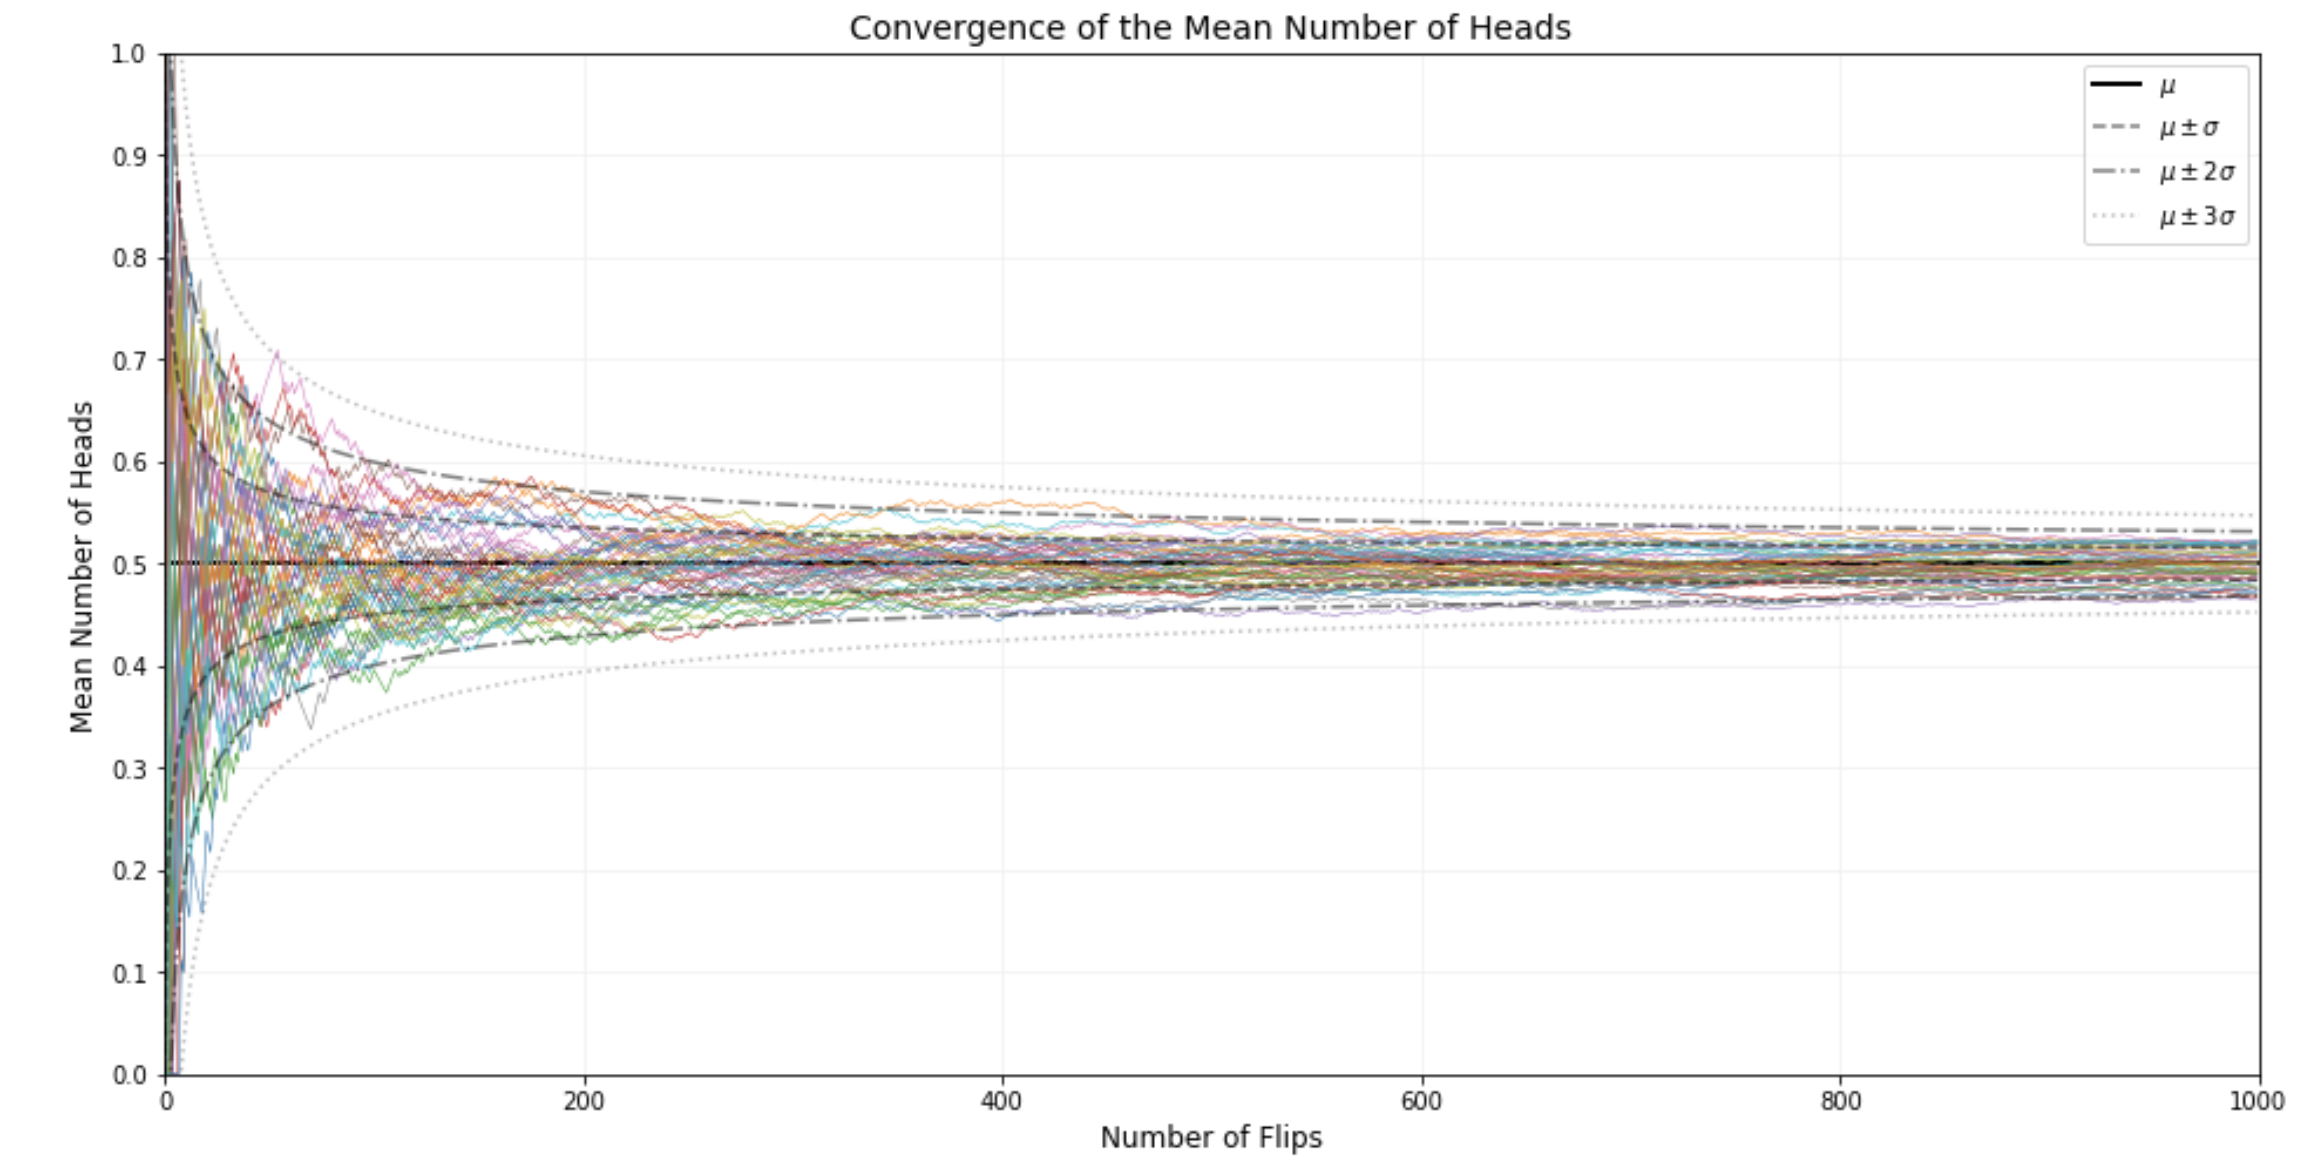


## Experiment One: What happens to the expected value when we keep flipping a coin?

In [100]:
n = 10**6            # Change this to see effect of more or less trials

count = 0
for k in range(n):
    count += randint(0,1)
mu = count/n

print("n = " + str(n) + "\t result = " + str(mu)+ "\tVar = " + str(0.5/n))
if (mu-0.5) >= 0:
    print("sigma = " + str(0.25 * (1/(n**0.5))))
else:
    print("sigma =  " + str(0.25 * (1/(n**0.5))))
print("delta = " + str(mu-0.5))


n = 1000000	 result = 0.0	Var = 5e-07
sigma =  0.00025
delta = -0.5


## Experiment Two: How does variance decrease as n gets larger?

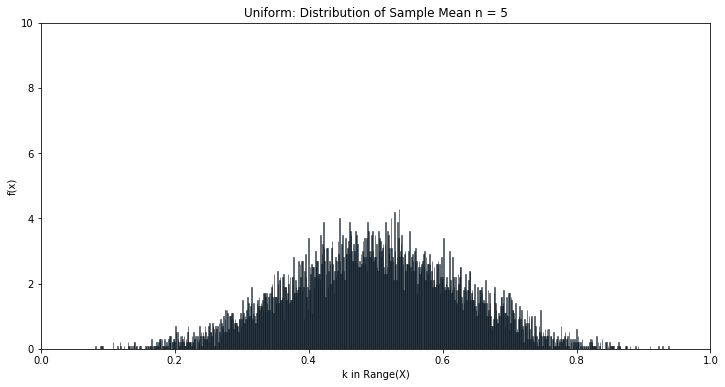

In [101]:
def sampleMeanUniform(n):
    return sum([random() for i in range(n)]) / n

def display_sample_mean_uniform(n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    ax.set_xlim(0,1)
    ax.set_ylim(0,10)
    plt.title('Uniform: Distribution of Sample Mean n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sampleMeanUniform(n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    

    plt.show()

n = 5                # try for 1, 2, 5, 10, 30, 100, 1000
num_trials = 10**4
display_sample_mean_uniform(n,num_trials,3)

However, we can say much more than this, and that is the content of the next section. 

## The Central Limit Theorem

We expect the normal distribution to arise whenever the outcome of a situation results from numerous small additive components, with no single or small group of effects dominant (since all the components are independent). Hence, it occurs regularly in biostatistics (where many genes and many environmental factors add together to produce some result, such as intelligence or height), in errors in measurement (where many small errors add up), and finance (where many small effects contribute for example to the price of a stock). 
The CLT provides the formal justification for this phenomenon. 



To state the CLT, first, suppose we <strong>standardize</strong> $\overline{X}_n$ by subtracting $\mu$ and dividing by its standard deviation $ \frac{\sigma}{\sqrt{n}}$ to obtain a new random variable $Z_n$:

$$
          Z_n = \frac{\overline{X}_n - \mu }{\frac{\sigma}{\sqrt{n}}}        
$$

Then the CLT states that as $n\mapsto\infty$, $Z_n$ converges to the standard normal $Z\sim N(0,1)$, that is:

$$
          \lim_{n \to \infty}\, P( Z_n \le a ) \,= \int_{-\infty}^a
          \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} \; dx
$$

A simpler version of this theorem is the following, which has immense consequences for the development of sampling theory (which is our next topic in CS 237). 

<blockquote>
As $n$ gets large, the random variable $\overline{X}_n$ converges to the distribution $N\big(\mu,\frac{\sigma^2}{n}\big)$.
</blockquote>

<blockquote>
As $n$ gets large, the random variable $\overline{Z}_n$ converges to the distribution $N(0,1)$.
</blockquote>
There are several crucial things to remember about the CLT:

<ol>
<li>The mean $\mu$ of $\overline{X}_n$ is the same as the $X_i$.</li>
<li>The standard deviation $\frac{\sigma}{\sqrt{n}}$ gets smaller as $n$ gets larger, and approaches 0 as $n$ approaches $\infty$.</li>
<li> We can use the strong properties of the normal distribution, such as the "68-95-99 rule," to quantify the randomness inherent in the sampling process. This will be the fundamental fact we will use in developing the various statistical procedures in elementary statistics. 
    <li>The requirement that the $X_i$ be <i>i.i.d.</i> can be relaxed so that, under certain very technical conditions, they can be different distributions, as long as they have the same finite mean and standard deviation.  Typically, however, these are separate "pokes" of the same random variable.   To learn more about the CLT, check out the Wikipedia page.     </li>
</ol>




## Experiments with the CLT

We will verify the CLT with several distributions:

    - Uniform     U ~ random()                 mean is 0.5   std dev = sqrt( 1/ 12 ) 
    - Bernoulli   X ~ Bernoulli(p=0.61)        mean is 0.61  std dev = (0.61)*(0.39)   
    - Exponential E ~ Exponential(lambda=0.1)  mean is 10    std dev = 100
    - Normal      Y ~ N(mu=66,sigma^2=9)       mean is 66    std dev = 3
    - Combination of all four, standardized to have mean 0 and variance 1. 


## Experiment Three: Uniform Distribution

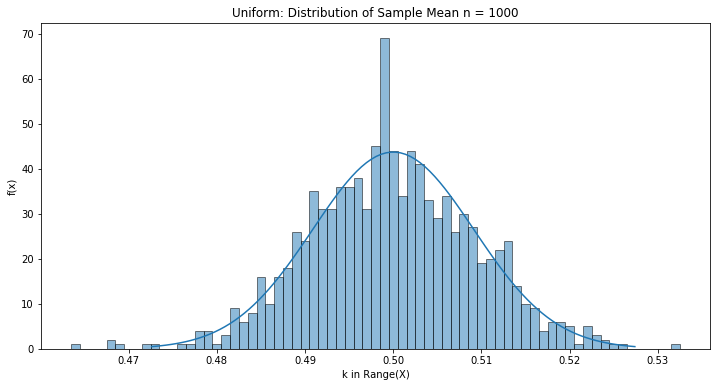

In [102]:
def sampleMeanUniform(n):
    X = [random() for i in range(n)]
    return sum(X)/n

def display_sample_mean_uniform(n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Uniform: Distribution of Sample Mean n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sampleMeanUniform(n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)
    mu = 0.5
    sigma = ((1/12)**0.5) / n**0.5
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

n = 1000                 # try for 1, 10, 30, 100
num_trials = 1000
display_sample_mean_uniform(n,num_trials,3)

## Experiment Four: Bernoulli

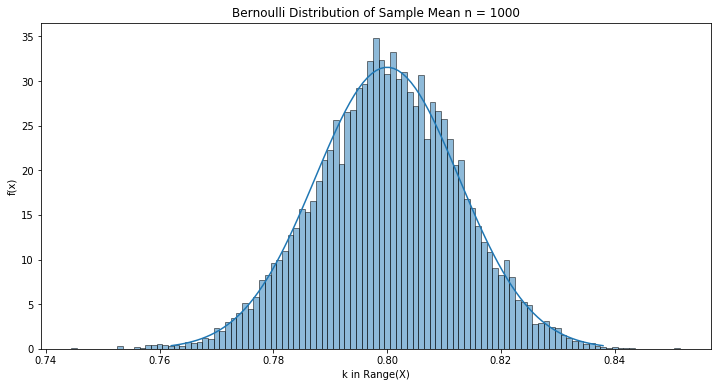

In [103]:

    
def sampleMeanBernoulli(p,n):
    X = [bernoulli(p) for i in range(n)]
    return sum(X)/n

def display_sample_mean_bernoulli(p,n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Bernoulli Distribution of Sample Mean n = ' +str(n) )
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sampleMeanBernoulli(p,n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)
    mu = p
    sigma = (p*(1-p))**0.5/(n**0.5)
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

p = 0.8
n = 1000                 # try for 10, 100, 500, 1000
num_trials = 10000
display_sample_mean_bernoulli(p,n,num_trials,3)

## Experiment Five: Exponential

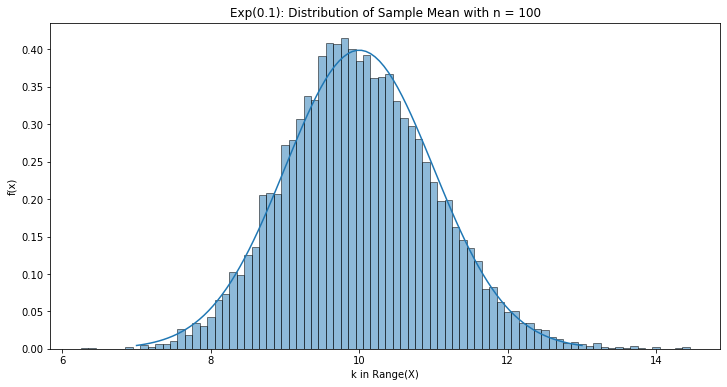

In [104]:
def sampleMeanExponential(lam,n):
    X = [exponential(1/lam) for i in range(n)]
    return sum(X)/n

def display_sample_mean_Exponential(lam,n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Exp('+str(lam)+'): Distribution of Sample Mean with n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use exponential to generate random samples
    X = [sampleMeanExponential(lam,n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)
    mu = 1/lam
    sigma = 1/lam / (n**0.5)
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

lam = 0.1
n = 100                 # try for 1, 2, 5, 10, 30, 100
num_trials = 10000
display_sample_mean_Exponential(lam,n,num_trials,1)



## Experiment Six: Normal

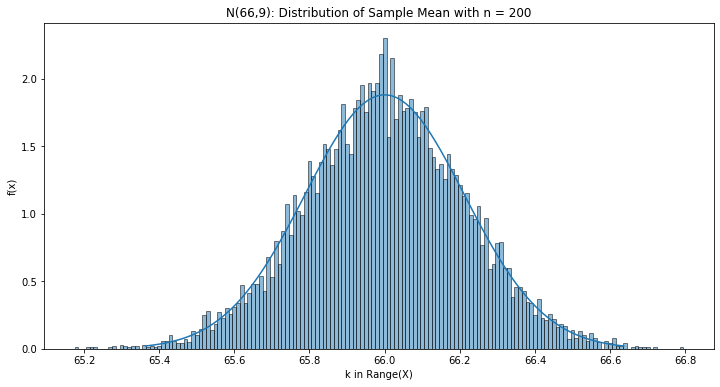

In [105]:
def sampleMeanNormal(mu,sigma,n):
    X = normal(mu,sigma,n) 
    return sum(X)/n

def display_sample_mean_normal(mu,sigma,n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('N('+str(mu)+','+str(sigma**2)+'): Distribution of Sample Mean with n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # generate random samples
    X = [sampleMeanNormal(mu,sigma,n) for i in range(num_trials)]
    Xrounded = np.around(X,decimals)
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)

    sigma = sigma / (n**0.5)
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

mu = 66
sigma = 3
n = 200                 # try for 1, 2, 5, 10, 30, 100
num_trials = 10000
display_sample_mean_normal(mu,sigma,n,num_trials,2)


## Experiment Seven

In this last experiment, we will verify that this works for different distributions.
The most common distributions satisfy the restrictions necessary for the CLT to
apply, so we will "cycle" through four different distributions as we take the sum of the $n$ RVs. In order to make sure they all have the same mean and variance, we shall standardize each (as if calculating a "z-score" for an arbitrary distribution). 

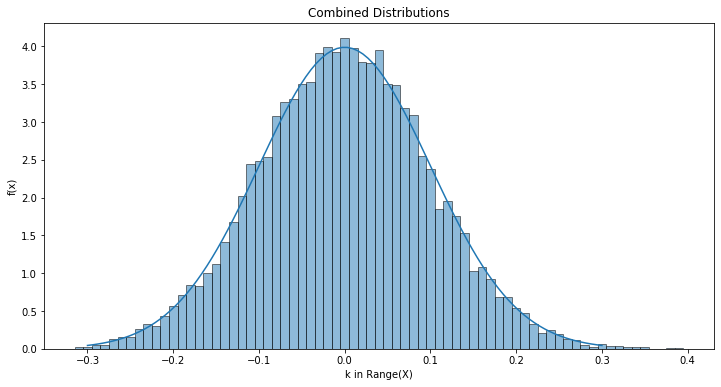

In [106]:
def sampleMeanCombined(n):
    s = 0
    for i in range(n):
        k = i % 4
        if k == 0:
            s += (random()-0.5) * (12 ** 0.5)
        elif k == 1:
            s += (bernoulli(0.61)-0.61) /  ((0.61 * 0.39)**0.5)            
        elif k == 2:
            s += exponential(1) - 1          
        else:  # k == 3
            s += normal(0,1)           
    return s/n

def display_sample_mean_combined(n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Combined Distributions')
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use previous function to generate random samples
    X = [sampleMeanCombined(n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for mean 0 and std dev 1/sqrt(n)

    sigma = 1 / (n**0.5)
    X2 = np.linspace(-sigma*3,sigma*3,100)
    Y = [norm.pdf(x,0,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

n = 100                 # try for 1, 2, 5, 10, 30, 100
num_trials = 10000
display_sample_mean_combined(n,num_trials,2)
